#Understanding the data

#Exploratory Data Analysis

Titanic dataset - https://www.kaggle.com/datasets/shubhamgupta012/titanic-dataset

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
files.upload()

Saving SVMtrain.csv to SVMtrain (1).csv


{'SVMtrain (1).csv': b'PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked\r\n1,0,3,Male,22,1,0,7.25,3\r\n2,1,1,female,38,1,0,71.2833,1\r\n3,1,3,female,26,0,0,7.925,3\r\n4,1,1,female,35,1,0,53.1,3\r\n5,0,3,Male,35,0,0,8.05,3\r\n6,0,3,Male,60,0,0,8.4583,2\r\n7,0,1,Male,54,0,0,51.8625,3\r\n8,0,3,Male,2,3,1,21.075,3\r\n9,1,3,female,27,0,2,11.1333,3\r\n10,1,2,female,14,1,0,30.0708,1\r\n11,1,3,female,4,1,1,16.7,3\r\n12,1,1,female,58,0,0,26.55,3\r\n13,0,3,Male,20,0,0,8.05,3\r\n14,0,3,Male,39,1,5,31.275,3\r\n15,0,3,female,14,0,0,7.8542,3\r\n16,1,2,female,55,0,0,16,3\r\n17,0,3,Male,2,4,1,29.125,2\r\n18,1,2,Male,60,0,0,13,3\r\n19,0,3,female,31,1,0,18,3\r\n20,1,3,female,60,0,0,7.225,1\r\n21,0,2,Male,35,0,0,26,3\r\n22,1,2,Male,34,0,0,13,3\r\n23,1,3,female,15,0,0,8.0292,2\r\n24,1,1,Male,28,0,0,35.5,3\r\n25,0,3,female,8,3,1,21.075,3\r\n26,1,3,female,38,1,5,31.3875,3\r\n27,0,3,Male,60,0,0,7.225,1\r\n28,0,1,Male,19,3,2,263,3\r\n29,1,3,female,60,0,0,7.8792,2\r\n30,0,3,Male,60,0,0,7.8958,3\r\

In [3]:
data = pd.read_csv('SVMtrain.csv')

In [4]:
#question 1 - How big is the data?
data.shape


(889, 9)

In [5]:
#question 2 - How does the data look like?
display(data.head(5))

display(data.sample(5)) #random 5 rows

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
436,438,1,2,female,24.0,2,3,18.7500,3
265,267,0,3,Male,16.0,4,1,39.6875,3
696,698,1,3,female,60.0,0,0,7.7333,2
618,620,0,2,Male,26.0,0,0,10.5000,3
593,595,0,2,Male,37.0,1,0,26.0000,3


In [6]:
#question 3 - What is the data type of the columns?

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


In [7]:
#question 4 - Are there any missing values?

data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [8]:
#question 5 - How does the data look mathematically?

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [9]:
#question 6 - Are there any duplicate values?

data.duplicated().sum()

0

In [10]:
#question 7 - Is there any correlation between the columns?

data2 = data.select_dtypes(include=['number'])
display(data2.corr())

display(data2.corr()['Survived'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005028,-0.035330,0.008341,-0.057686,-0.001657,0.012703,0.013166
Survived,-0.005028,1.000000,-0.335549,-0.116558,-0.034040,0.083151,0.255290,-0.169718
Pclass,-0.035330,-0.335549,1.000000,-0.122449,0.081656,0.016824,-0.548193,0.164681
Age,0.008341,-0.116558,-0.122449,1.000000,-0.156777,-0.215191,-0.003307,-0.124894
SibSp,-0.057686,-0.034040,0.081656,-0.156777,1.000000,0.414542,0.160887,0.068900
Parch,-0.001657,0.083151,0.016824,-0.215191,0.414542,1.000000,0.217532,0.040449
Fare,0.012703,0.255290,-0.548193,-0.003307,0.160887,0.217532,1.000000,-0.226311
Embarked,0.013166,-0.169718,0.164681,-0.124894,0.068900,0.040449,-0.226311,1.000000


,Survived
PassengerId,-0.005028
Survived,1.000000
Pclass,-0.335549
Age,-0.116558
SibSp,-0.034040
Parch,0.083151
Fare,0.255290
Embarked,-0.169718


Univariate Analysis : where only one variable is analyzed at a time.

for categorical columns --> countplot, piechart,

for numerical columns --> Histogram , Distplot , Boxplot

,count
Survived,
0,549
1,340


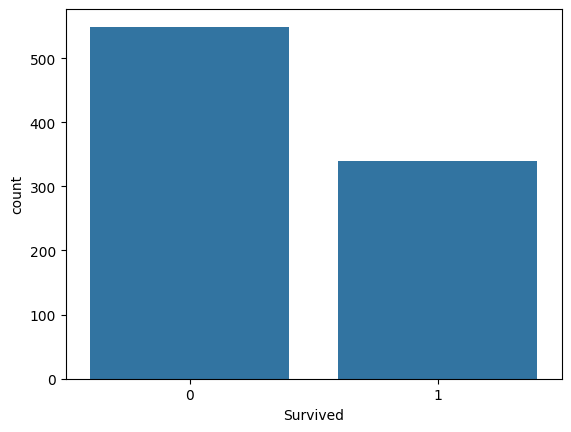

In [12]:
#1. Countplot -- for any categorical column, gives the frequency of the catergories from the particular column.

sns.countplot(x='Survived', data=data)
data['Survived'].value_counts()

,count
Pclass,
3,491
1,214
2,184


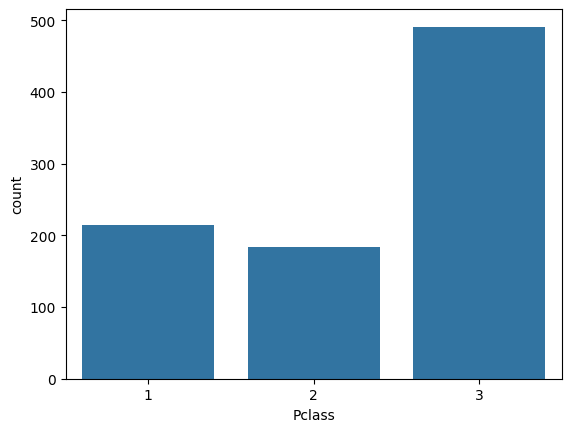

In [13]:
sns.countplot(x='Pclass', data=data)
data['Pclass'].value_counts()

,count
Sex,
Male,577
female,312


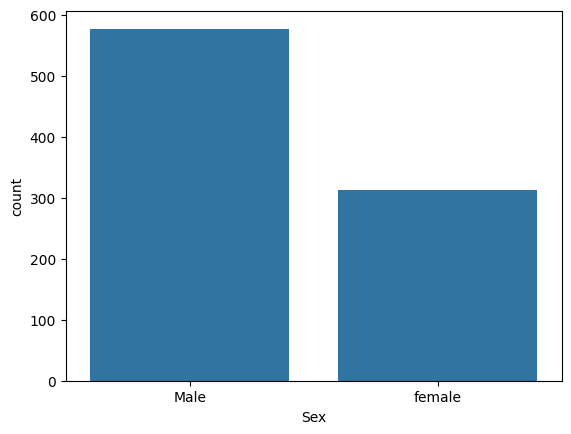

In [14]:
sns.countplot(x='Sex', data=data)
data['Sex'].value_counts()

,count
Embarked,
3,644
1,168
2,77


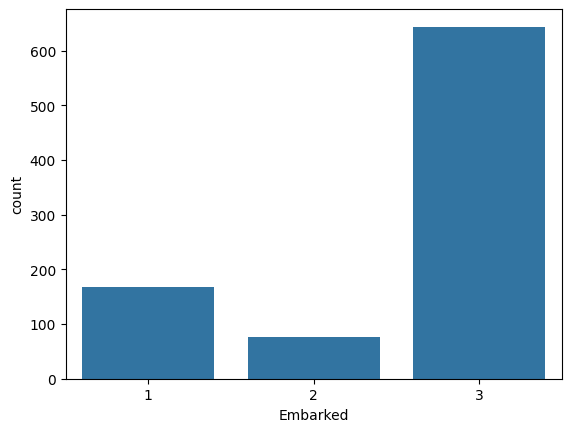

In [15]:
sns.countplot(x='Embarked', data=data)
data['Embarked'].value_counts()

<Axes: ylabel='count'>

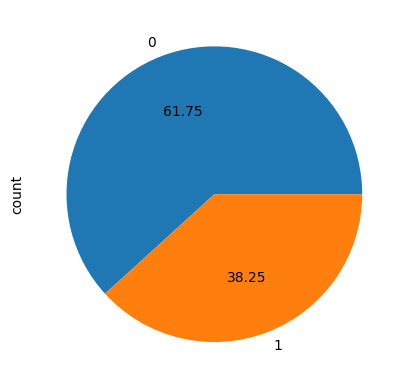

In [16]:
# Pie Chart -- for Categorical data
data['Survived'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

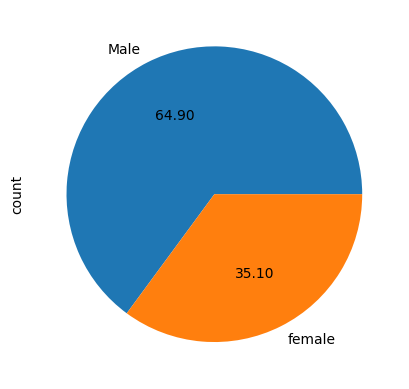

In [17]:
data['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

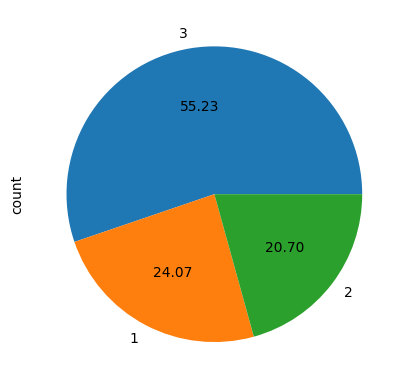

In [18]:
data['Pclass'].value_counts().plot(kind='pie',autopct='%.2f')

(array([ 54.,  46., 177., 169., 117.,  70.,  45., 200.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

(array([ 24.,   6.,  14.,   3.,   7.,   8.,   6.,   3.,   7.,  22.,  13.,
         51.,  40.,  27.,  46.,  24.,  36.,  47.,  27.,  35.,  17.,  34.,
         29.,  10.,  27.,   8.,  18.,   9.,  17.,  18.,   6.,  17.,   6.,
          9.,   7.,   2.,   7., 181.,   6.,   4.,   3.,   1.,   0.,   2.,
          3.,   0.,   1.,   0.,   0.,   1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

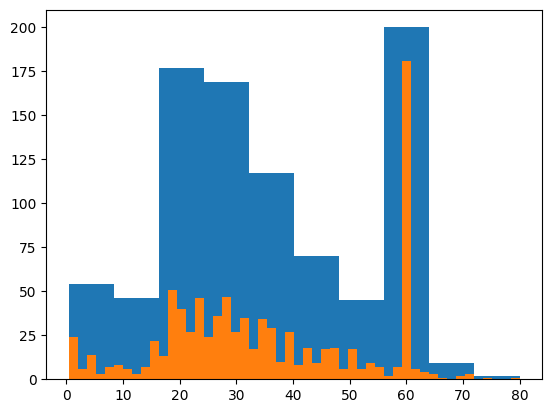

In [20]:
#Numerical data

#Histogram - for continous data , to see the distribution of data, creates ranges using bins.

display(plt.hist(data['Age']))
display(plt.hist(data['Age'],bins=50))

Histograms are more useful for discrete numerical data when the values are numerous and closely spaced, making the data behave like continuous data.

<Axes: xlabel='Age', ylabel='Density'>

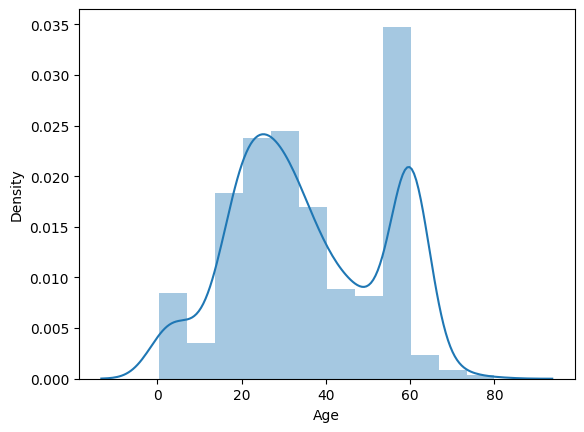

In [21]:
#distplot -- KDE kernel density estimation curve over the histogram , shows the distribution of the data called the Probability Density Function PDF
sns.distplot(data['Age'])

Histogram tells us the exact number value from the distribution, PDF tells us the probability of the value.

Distplot also tells about the skewness of the curve.

<Axes: ylabel='Fare'>

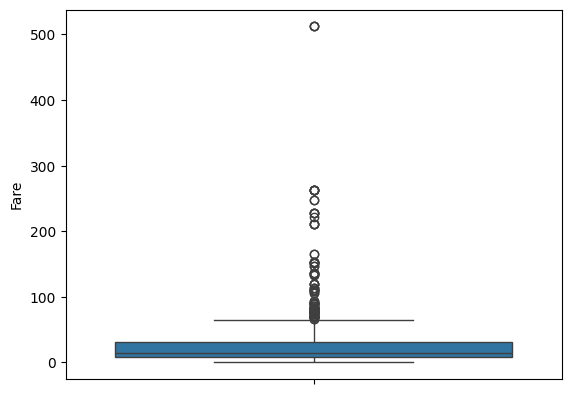

In [24]:
#Boxplot -- gives us the Five Number Summary (Min , Q1 , Median , Q3 , Max) , helps with outliers

display(sns.boxplot(data['Fare']))


Calculate other statistical values in Univariate analysis



In [25]:
data['Age'].min()

0.42

In [26]:
data['Age'].max()

80.0

In [27]:
data['Age'].mean()

35.686355455568055

In [28]:
data['Age'].std()

17.756732671603913

In [29]:
data['Age'].skew() #a positive value shows right skewed , negative value shows left skewed and 0 shows Bell curve

0.10445735233374523

Bivariate Analysis: Relationship between two variables.

1. Scatterplot -- Numerical and Numerical
2. Bar Plot -- Numerical and Categorical
3. Box Plot -- Numerical and Categorical
4. Distplot -- Numerical and Categorical
5. Heatmap -- Categorical and Categorical
6. Clustermap -- Categorical and Categorical
7. Pairplot -- relationship between scatterplots
8. Lineplot -- Numerical and Numerical(time related)

In [30]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [31]:
titanic = data.head(20)
display(titanic)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3
5,6,0,3,Male,60.0,0,0,8.4583,2
6,7,0,1,Male,54.0,0,0,51.8625,3
7,8,0,3,Male,2.0,3,1,21.0750,3
8,9,1,3,female,27.0,0,2,11.1333,3
9,10,1,2,female,14.0,1,0,30.0708,1


In [32]:
flights = sns.load_dataset('flights')
display(flights.head())

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [33]:
iris = sns.load_dataset('iris')
display(iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='total_bill', ylabel='tip'>

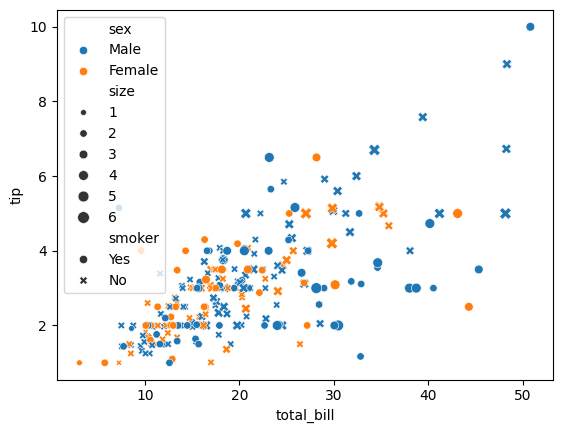

In [ ]:
#scatterplot - relationship between 2 numerical columns

display(sns.scatterplot(x = tips['total_bill'],y = tips['tip'],hue=tips['sex'],style=tips['smoker'], size=tips['size']))

<Axes: xlabel='total_bill', ylabel='tip'>

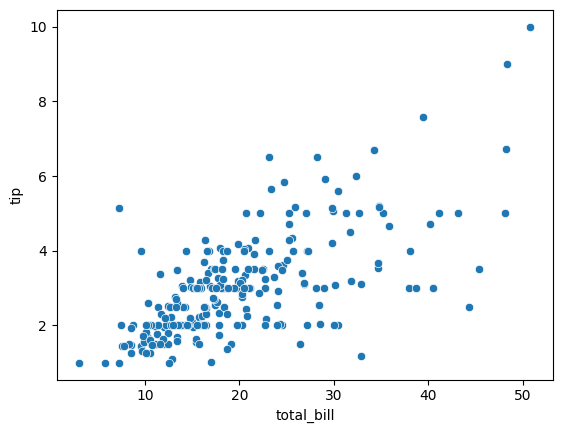

In [34]:
display(sns.scatterplot(x = tips['total_bill'],y = tips['tip']))

linear relationship between the two features

<Axes: xlabel='Pclass', ylabel='Age'>

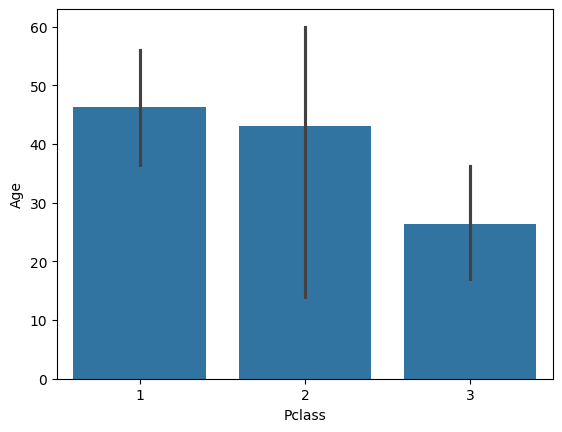

In [35]:
#Barplot - finds relationship when 1 column is numeric and other is categorical. categories on X axis and numerics on Y.
sns.barplot(x="Pclass", y="Age", data=titanic, order=[1, 2, 3])


<Axes: xlabel='Pclass', ylabel='Fare'>

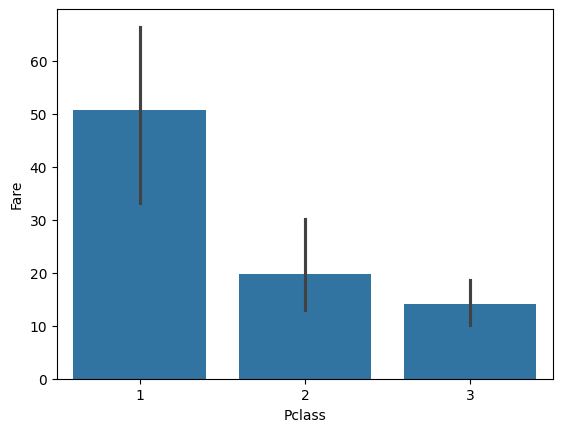

In [36]:
sns.barplot(x="Pclass", y="Fare", data=titanic, order=[1, 2, 3])


<Axes: xlabel='Pclass', ylabel='Age'>

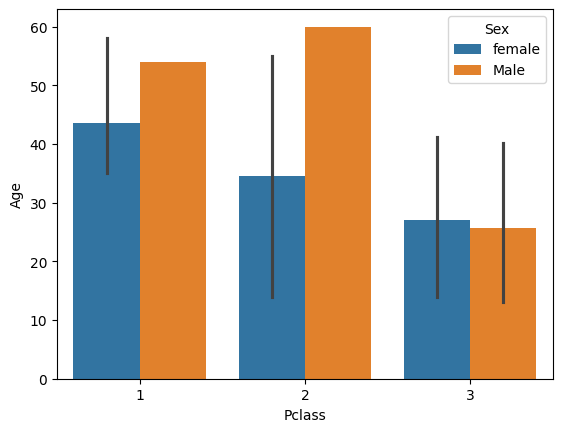

In [37]:
sns.barplot(x='Pclass' , y='Age' , data=titanic , hue=titanic['Sex'])

<Axes: xlabel='Sex', ylabel='Age'>

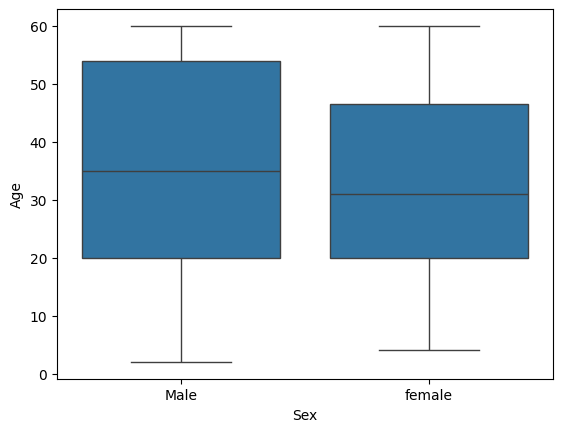

In [38]:
#Box Plot - finds relationship when 1 column is numeric and other is categorical . categories on X axis and numerics on Y.

sns.boxplot(x='Sex' , y='Age' , data=titanic)

<Axes: xlabel='Age', ylabel='Density'>

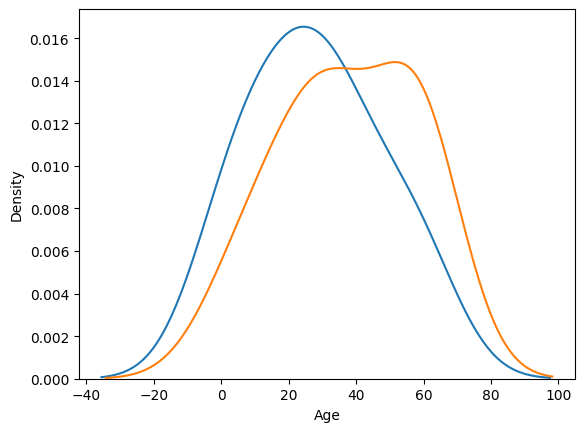

In [40]:
#distplot
titanic = titanic[titanic['Age']>= 0]

sns.distplot(titanic[titanic['Survived']==0]['Age'],hist=False)
sns.distplot(titanic[titanic['Survived']==1]['Age'],hist=False)

In [ ]:
#Heatmap - both features are Categorical, helps understanding the frequency based on the colour

pd.crosstab(data['Pclass'],data['Survived'])

Survived,0,1
Pclass,,
1,80,134
2,97,87
3,372,119


<Axes: xlabel='Survived', ylabel='Pclass'>

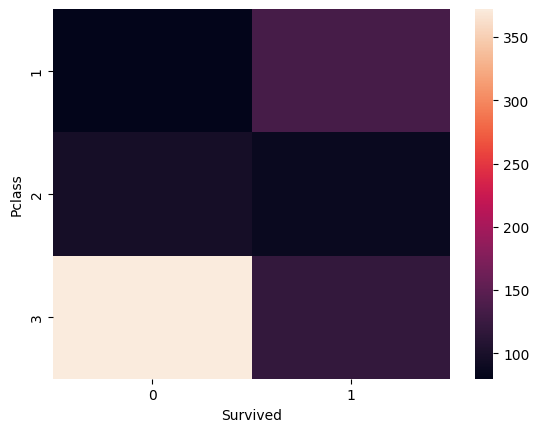

In [41]:
sns.heatmap(pd.crosstab(data['Pclass'],data['Survived']))

The lighter the colour, more the number.

In [42]:
#clustermap - both categorical columns, tells the closeness between the values

pd.crosstab(data['SibSp'],data['Survived'])

Survived,0,1
SibSp,,
0,398,208
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


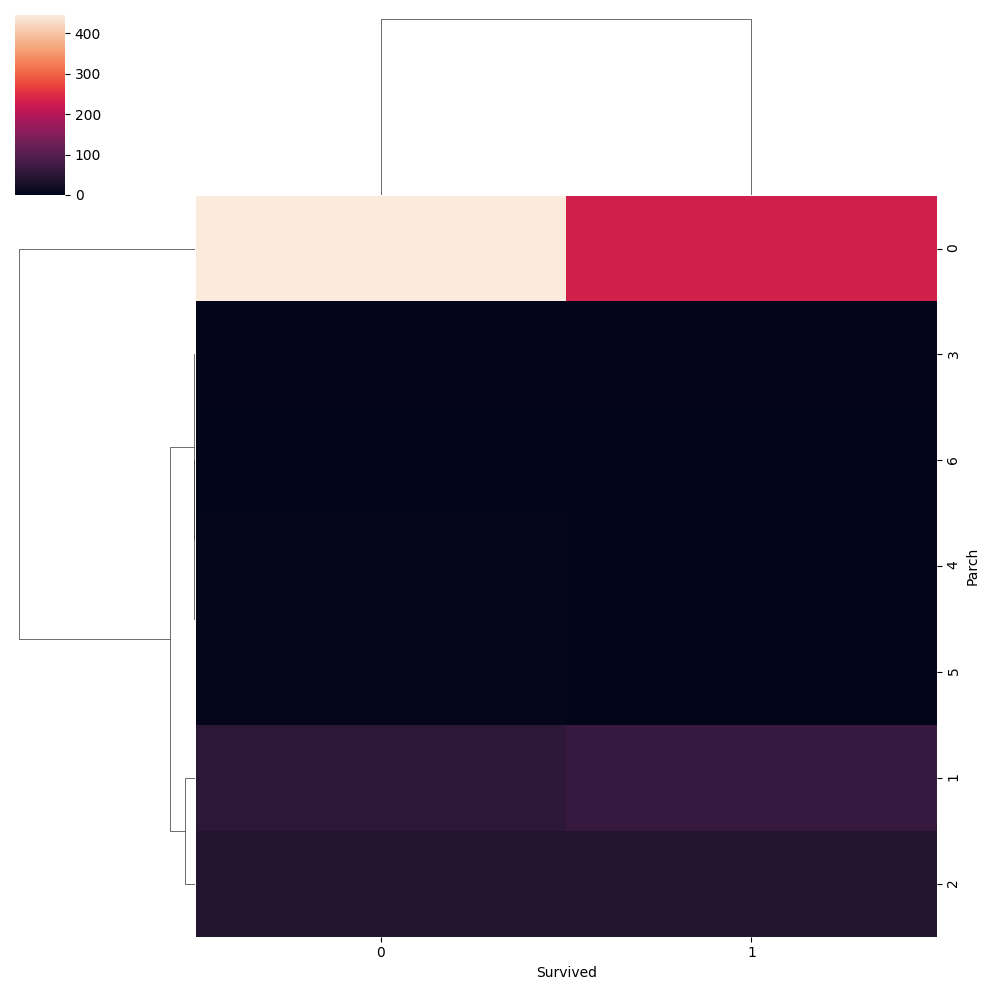

In [43]:
sns.clustermap(pd.crosstab(data['Parch'],data['Survived']))

The thin blacklines are dendograms that captures a hierarchical relationship between the data or tells the closeness of the values

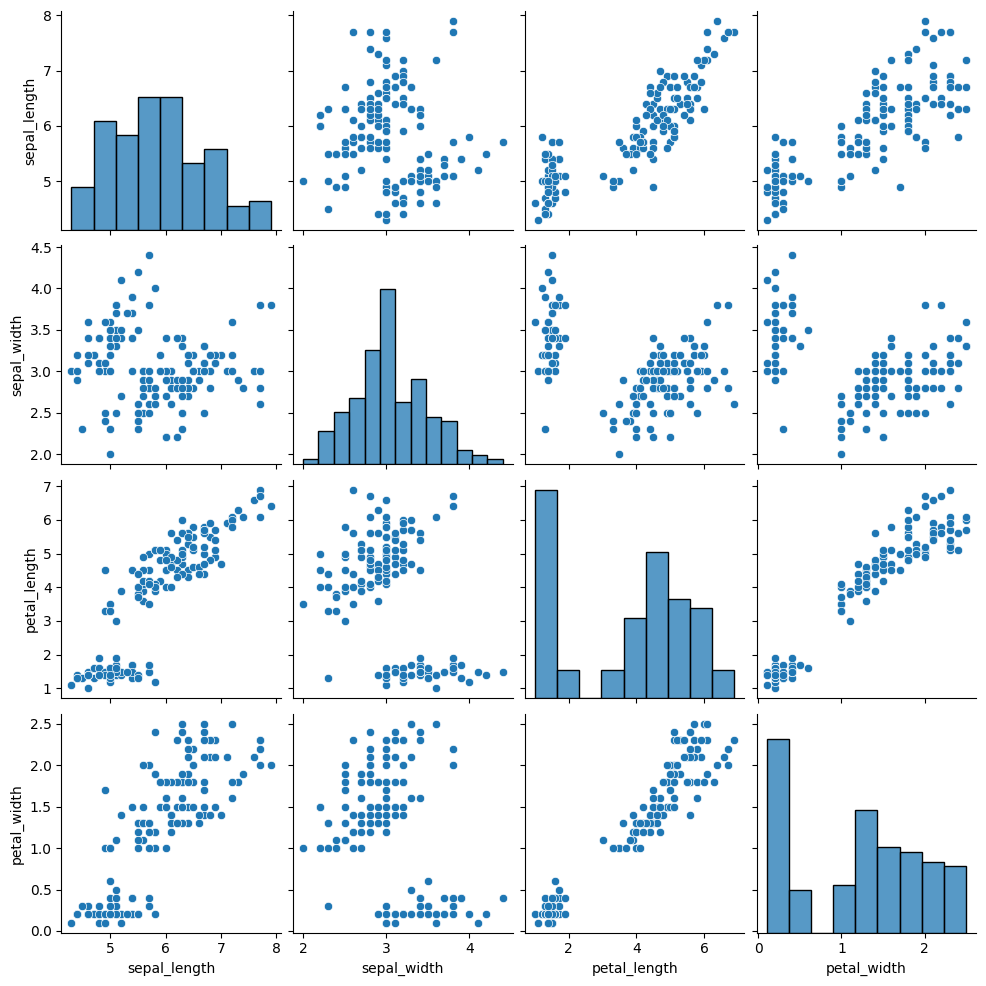

In [44]:
#pairplot -collection of scatterplots, it automatically finds the numerical columns in the data.

sns.pairplot(iris)

A histogram is seen when it plots the relationship with itself, other are grid of scatterplots that gives relationships of two numerical columns

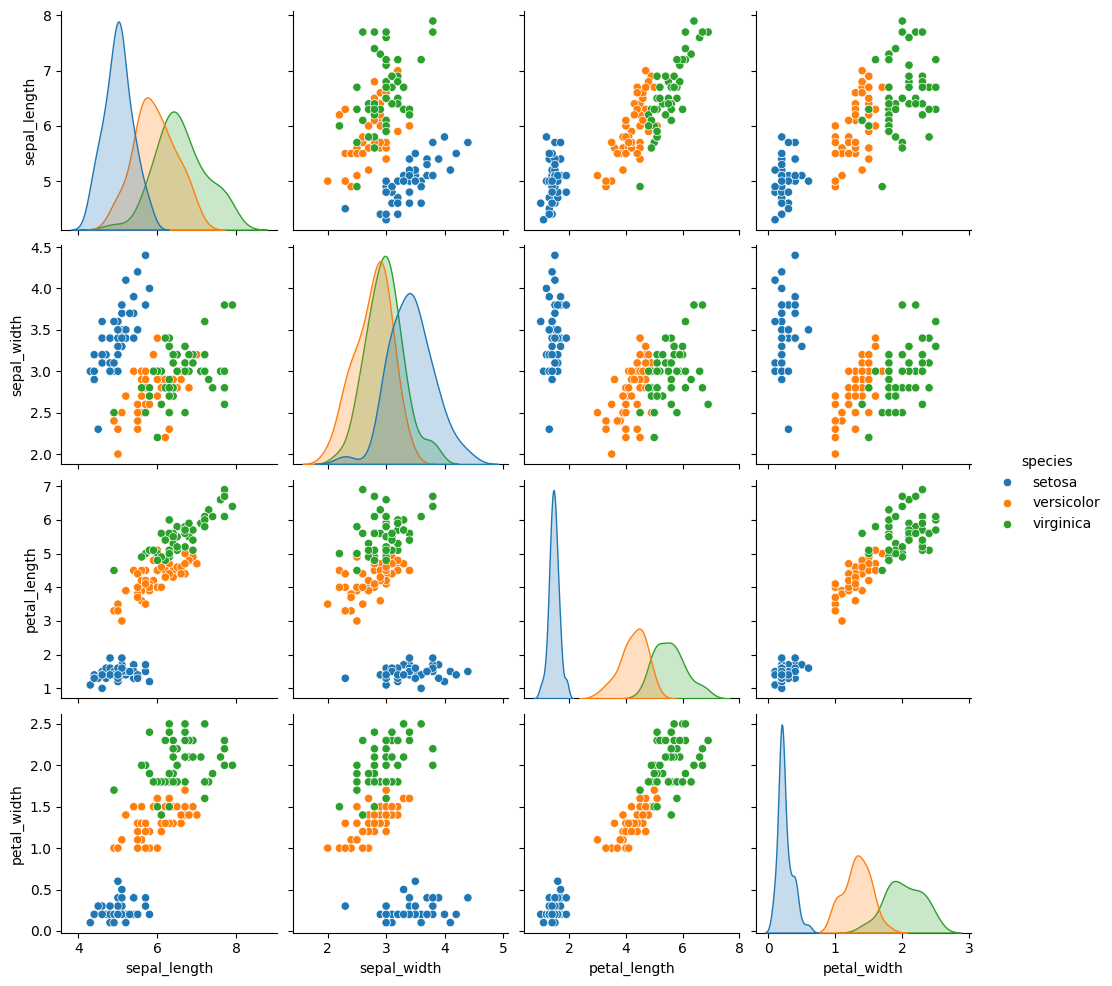

In [45]:
#add hue for multivariate analysis in pairplot

sns.pairplot(iris , hue='species')

In [46]:
#Lineplot - for 2 numerical columns  , it is special case of scatterplot , use it when X axis has time based features

flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [48]:
flights = flights.select_dtypes(exclude=['category'])  # to Exclude categorical columns because pandas cannot use sum() func on categorical cols.
new = flights.groupby('year').sum().reset_index()

<Axes: xlabel='year', ylabel='passengers'>

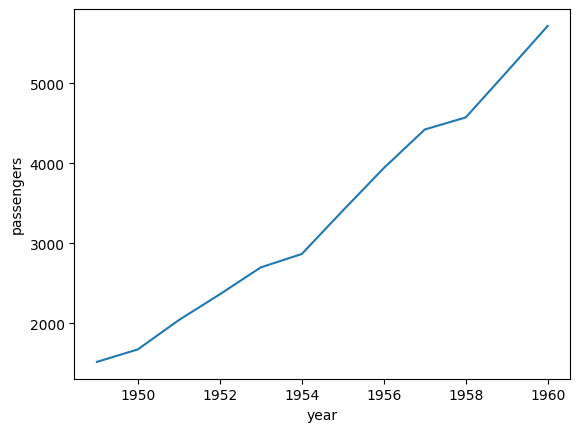

In [49]:
sns.lineplot(x=new['year'],y=new['passengers'])